# Search the best Machine Learning Algorithms to predict

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
import time
start = time.time()

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
plt.style.use('seaborn')

np.set_printoptions(precision=4)

In [41]:
data = pd.read_csv('./data_f1/data_filtered.csv')

In [42]:
data.head()

,year,date,quali_pos,statusId,position,dob,driver_nationality,constructor,constructor_nationality,GP_name,country,driver,age_at_gp_in_days,driver_home,constructor_home,driver_dnf,constructor_dnf
0,2011,2011-03-27,18,11,18,1977-05-10,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nick Heidfeld,12374,0,0,0,1
1,2010,2010-03-28,9,1,9,1984-12-07,Pol,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Robert Kubica,9242,0,0,0,0
2,2017,2017-03-26,11,11,12,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nico Hülkenberg,10812,0,0,0,1
3,2018,2018-03-25,7,1,8,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nico Hülkenberg,11176,0,0,0,0
4,2019,2019-03-17,11,11,11,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,Aus,Nico Hülkenberg,11533,0,0,0,1


In [43]:
len(data)

4803

In [110]:
data[(data['year']==2021) & (data['constructor']=='Haas F1 Team') & (data['driver']=='Mick Schumacher')]

,year,date,quali_pos,statusId,position,dob,driver_nationality,constructor,constructor_nationality,GP_name,...,driver,age_at_gp_in_days,driver_home,constructor_home,driver_dnf,constructor_dnf,driver_confidence,constructor_reliability,active_driver,active_constructor
840,2021,2021-03-28,18,11,19,1999-03-22,Ger,Haas F1 Team,Ame,Bahrain International Circuit,...,Mick Schumacher,8042,0,0,0,1,1.0,0.351598,1,1
1099,2021,2021-05-09,18,12,18,1999-03-22,Ger,Haas F1 Team,Ame,Circuit de Barcelona-Catalunya,...,Mick Schumacher,8084,0,0,0,1,1.0,0.351598,1,1
1675,2021,2021-07-18,18,11,19,1999-03-22,Ger,Haas F1 Team,Ame,Silverstone Circuit,...,Mick Schumacher,8154,0,0,0,1,1.0,0.351598,1,1
3805,2021,2021-04-18,18,12,18,1999-03-22,Ger,Haas F1 Team,Ame,Autodromo Enzo e Dino Ferrari,...,Mick Schumacher,8063,0,0,0,1,1.0,0.351598,1,1
4139,2021,2021-06-06,17,1,17,1999-03-22,Ger,Haas F1 Team,Ame,Baku City Circuit,...,Mick Schumacher,8112,0,0,0,0,1.0,0.351598,1,1
4329,2021,2021-06-27,19,12,19,1999-03-22,Ger,Haas F1 Team,Ame,Red Bull Ring,...,Mick Schumacher,8133,0,0,0,1,1.0,0.351598,1,1
4330,2021,2021-07-04,19,12,19,1999-03-22,Ger,Haas F1 Team,Ame,Red Bull Ring,...,Mick Schumacher,8140,0,0,0,1,1.0,0.351598,1,1
4667,2021,2021-06-20,15,11,15,1999-03-22,Ger,Haas F1 Team,Ame,Circuit Paul Ricard,...,Mick Schumacher,8126,0,0,0,1,1.0,0.351598,1,1
4795,2021,2021-05-02,19,12,19,1999-03-22,Ger,Haas F1 Team,Ame,Autódromo Internacional do Algarve,...,Mick Schumacher,8077,0,0,0,1,1.0,0.351598,1,1


In [104]:
data.groupby(['year']).agg(['count'])

,date,quali_pos,statusId,position,dob,driver_nationality,constructor,constructor_nationality,GP_name,country,driver,age_at_gp_in_days,driver_home,constructor_home,driver_dnf,constructor_dnf,driver_confidence,constructor_reliability,active_driver,active_constructor
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
year,,,,,,,,,,,,,,,,,,,,
2010,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456
2011,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452
2012,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476,476
2013,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418,418
2014,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405
2015,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364,364
2016,457,457,457,457,457,457,457,457,457,457,457,457,457,457,457,457,457,457,457,457
2017,398,398,398,398,398,398,398,398,398,398,398,398,398,398,398,398,398,398,398,398


In [44]:
dnf_by_driver = data.groupby('driver').sum()['driver_dnf']
driver_race_entered = data.groupby('driver').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver/driver_race_entered)
driver_confidence = 1-driver_dnf_ratio
driver_confidence_dict = dict(zip(driver_confidence.index,driver_confidence))

In [45]:
driver_confidence_dict

{'Adrian Sutil': 0.868421052631579,
 'Alexander Albon': 0.972972972972973,
 'Alexander Rossi': 1.0,
 'André Lotterer': 1.0,
 'Antonio Giovinazzi': 0.8979591836734694,
 'Brendon Hartley': 0.88,
 'Bruno Senna': 0.8260869565217391,
 'Carlos Sainz': 0.90625,
 'Charles Leclerc': 0.8695652173913043,
 'Charles Pic': 0.9487179487179487,
 'Christian Klien': 1.0,
 'Daniel Ricciardo': 0.949238578680203,
 'Daniil Kvyat': 0.9196428571428571,
 'Esteban Gutiérrez': 0.847457627118644,
 'Esteban Ocon': 0.9342105263157895,
 'Felipe Massa': 0.9161290322580645,
 'Felipe Nasr': 0.925,
 'Fernando Alonso': 0.9289617486338798,
 'George Russell': 0.9166666666666666,
 'Giedo van der Garde': 0.8421052631578947,
 'Heikki Kovalainen': 0.95,
 'Jack Aitken': 1.0,
 'Jaime Alguersuari': 0.9210526315789473,
 'Jarno Trulli': 0.972972972972973,
 'Jean-Éric Vergne': 0.9137931034482758,
 'Jenson Button': 0.9407407407407408,
 'Jolyon Palmer': 0.8571428571428572,
 'Jules Bianchi': 0.9117647058823529,
 "Jérôme d'Ambrosio": 0.

In [46]:
dnf_by_constructor = data.groupby('constructor').sum()['constructor_dnf']
constructor_race_entered = data.groupby('constructor').count()['constructor_dnf']
constructor_dnf_ratio = (dnf_by_constructor/constructor_race_entered)
constructor_reliability = 1-constructor_dnf_ratio
constructor_reliability_dict = dict(zip(constructor_reliability.index,constructor_reliability))

In [47]:
constructor_reliability_dict

{'Alfa Romeo': 0.42152466367713004,
 'AlphaTauri': 0.47874720357941836,
 'Alpine F1': 0.539906103286385,
 'Alpine F1 Team': 0.44999999999999996,
 'Aston Martin': 0.6146993318485523,
 'Caterham': 0.1785714285714286,
 'Ferrari': 0.88,
 'HRT': 0.15652173913043477,
 'Haas F1 Team': 0.35159817351598177,
 'Lotus': 0.07894736842105265,
 'Manor Marussia': 0.12121212121212122,
 'Marussia': 0.16666666666666663,
 'McLaren': 0.610738255033557,
 'Mercedes': 0.8841870824053453,
 'Red Bull': 0.8325892857142857,
 'Virgin': 0.09210526315789469,
 'Williams': 0.48106904231625836}

In [48]:
data['driver_confidence'] = data['driver'].apply(lambda x:driver_confidence_dict[x])
data['constructor_reliability'] = data['constructor'].apply(lambda x:constructor_reliability_dict[x])
#removing retired drivers and constructors
active_constructors = ['Alpine F1', 'Williams', 'McLaren', 'Ferrari', 'Mercedes',
                       'AlphaTauri', 'Aston Martin', 'Alfa Romeo', 'Red Bull',
                       'Haas F1 Team']
active_drivers = ['Daniel Ricciardo', 'Mick Schumacher', 'Carlos Sainz',
                  'Valtteri Bottas', 'Lance Stroll', 'George Russell',
                  'Lando Norris', 'Sebastian Vettel', 'Kimi Räikkönen',
                  'Charles Leclerc', 'Lewis Hamilton', 'Yuki Tsunoda',
                  'Max Verstappen', 'Pierre Gasly', 'Fernando Alonso',
                  'Sergio Pérez', 'Esteban Ocon', 'Antonio Giovinazzi',
                  'Nikita Mazepin','Nicholas Latifi']
data['active_driver'] = data['driver'].apply(lambda x: int(x in active_drivers))
data['active_constructor'] = data['constructor'].apply(lambda x: int(x in active_constructors))

In [49]:
data.head()

,year,date,quali_pos,statusId,position,dob,driver_nationality,constructor,constructor_nationality,GP_name,...,driver,age_at_gp_in_days,driver_home,constructor_home,driver_dnf,constructor_dnf,driver_confidence,constructor_reliability,active_driver,active_constructor
0,2011,2011-03-27,18,11,18,1977-05-10,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,...,Nick Heidfeld,12374,0,0,0,1,0.800000,0.539906,0,1
1,2010,2010-03-28,9,1,9,1984-12-07,Pol,Alpine F1,Fre,Albert Park Grand Prix Circuit,...,Robert Kubica,9242,0,0,0,0,0.975000,0.539906,0,1
2,2017,2017-03-26,11,11,12,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,...,Nico Hülkenberg,10812,0,0,0,1,0.900552,0.539906,0,1
3,2018,2018-03-25,7,1,8,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,...,Nico Hülkenberg,11176,0,0,0,0,0.900552,0.539906,0,1
4,2019,2019-03-17,11,11,11,1987-08-19,Ger,Alpine F1,Fre,Albert Park Grand Prix Circuit,...,Nico Hülkenberg,11533,0,0,0,1,0.900552,0.539906,0,1


In [50]:
data.columns

Index(['year', 'date', 'quali_pos', 'statusId', 'position', 'dob',
       'driver_nationality', 'constructor', 'constructor_nationality',
       'GP_name', 'country', 'driver', 'age_at_gp_in_days', 'driver_home',
       'constructor_home', 'driver_dnf', 'constructor_dnf',
       'driver_confidence', 'constructor_reliability', 'active_driver',
       'active_constructor'],
      dtype='object')

## Directory to store Models

In [51]:
import os
if not os.path.exists('./models'):
    os.mkdir('./models')

In [52]:
def position_index(x):
    if x<4:
        return 1
    if x>10:
        return 3
    else :
        return 2

## Model considering only Drivers

In [53]:
x_d= data[['GP_name','quali_pos','driver','age_at_gp_in_days','position','driver_confidence','active_driver']]

In [54]:
x_d = x_d[x_d['active_driver']==1]

In [55]:
sc  = StandardScaler()
le = LabelEncoder()
x_d['GP_name'] = le.fit_transform(x_d['GP_name'])
x_d['driver'] = le.fit_transform(x_d['driver'])
x_d['GP_name'] = le.fit_transform(x_d['GP_name'])
x_d['age_at_gp_in_days'] = sc.fit_transform(x_d[['age_at_gp_in_days']])
X_d = x_d.drop(['position','active_driver'],1)
y_d = x_d['position'].apply(lambda x: position_index(x))

In [56]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    result = cross_val_score(model,X_d,y_d,cv=cv,scoring='accuracy')
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.9305498804607693
DecisionTreeClassifier : 0.9198565529232775
RandomForestClassifier : 0.9426733318843731
SVC : 0.925890023907846
GaussianNB : 0.8671940882416866
KNeighborsClassifier : 0.9044664203434036


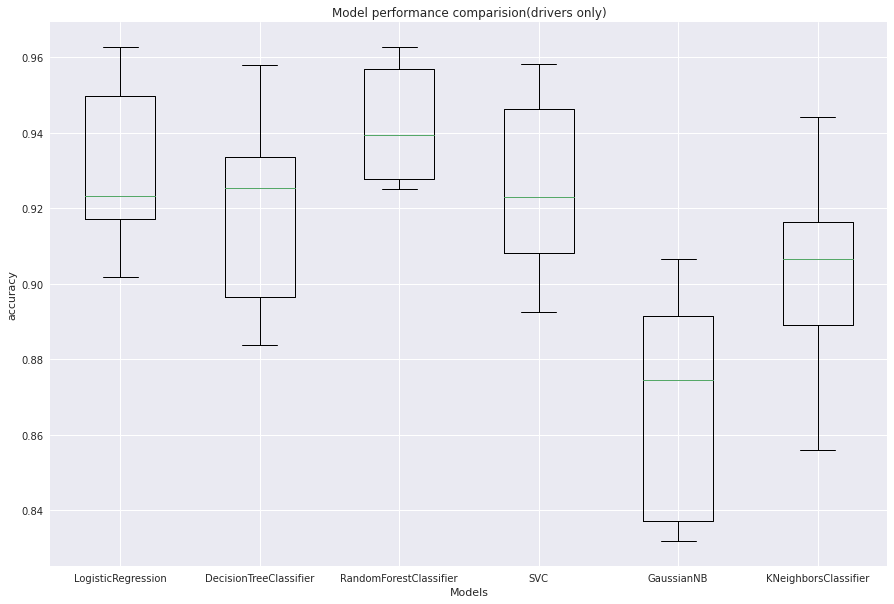

In [57]:
plt.figure(figsize=(15,10))
plt.boxplot(x=results_dri,labels=name)
plt.xlabel('Models')
plt.ylabel('accuracy')
plt.title('Model performance comparision(drivers only)')
plt.show()

## Model considering only Constructors

In [58]:
x_c = data[['GP_name','quali_pos','constructor','position','constructor_reliability','active_constructor']]

In [59]:
x_c = x_c[x_c['active_constructor']==1]

In [60]:
sc  = StandardScaler()
le = LabelEncoder()
x_c['GP_name'] = le.fit_transform(x_c['GP_name'])
x_c['constructor'] = le.fit_transform(x_c['constructor'])
X_c = x_c.drop(['position','active_constructor'],1)
y_c = x_c['position'].apply(lambda x: position_index(x))

In [61]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_const = []
results_const = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    result = cross_val_score(model,X_c,y_c,cv=cv,scoring='accuracy')
    mean_results_const.append(result.mean())
    results_const.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.9349881796690308
DecisionTreeClassifier : 0.9319148936170212
RandomForestClassifier : 0.9430260047281325
SVC : 0.9524822695035462
GaussianNB : 0.8517730496453902
KNeighborsClassifier : 0.9371158392434988


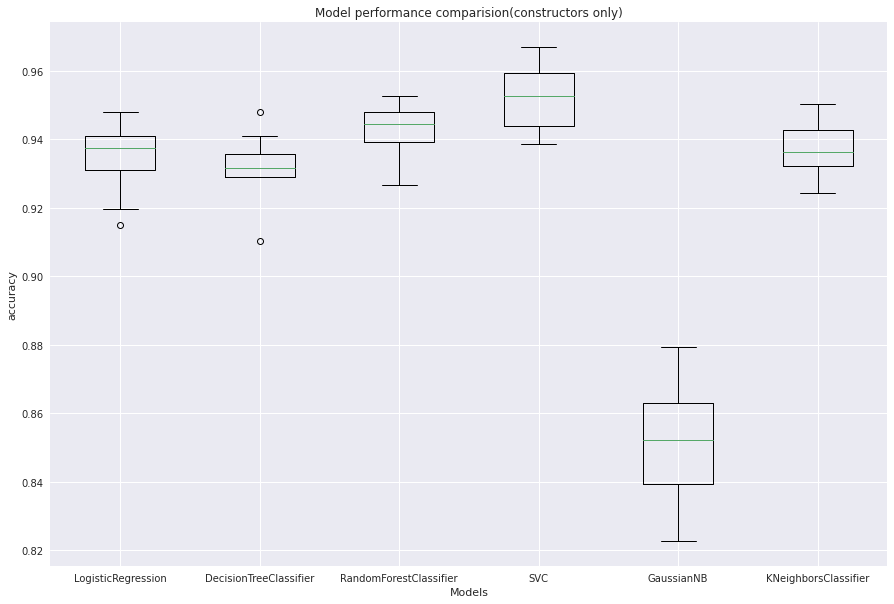

In [62]:
plt.figure(figsize=(15,10))
plt.boxplot(x=results_const,labels=name)
plt.xlabel('Models')
plt.ylabel('accuracy')
plt.title('Model performance comparision(constructors only)')
plt.show()

# Model considering both Drivers and Constructors

In [63]:
cleaned_data = data[['GP_name','quali_pos','constructor','driver','position','driver_confidence','constructor_reliability','active_driver','active_constructor']]
cleaned_data = cleaned_data[(cleaned_data['active_driver']==1)&(cleaned_data['active_constructor']==1)]
cleaned_data.to_csv('./data_f1/cleaned_data.csv',index=False)

In [64]:
x = data[['GP_name','quali_pos','constructor','driver','position','driver_confidence','constructor_reliability','active_driver','active_constructor']]

In [65]:
x = x[x['active_constructor']==1]
x = x[x['active_driver']==1]

In [66]:
sc  = StandardScaler()
le = LabelEncoder()
x['GP_name'] = le.fit_transform(x['GP_name'])
x['constructor'] = le.fit_transform(x['constructor'])
x['driver'] = le.fit_transform(x['driver'])
x['GP_name'] = le.fit_transform(x['GP_name'])
X = x.drop(['position','active_driver','active_constructor'],1)
y = x['position'].apply(lambda x: position_index(x))

In [67]:
#cross validation for different models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results = []
results = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    result = cross_val_score(model,X,y,cv=cv,scoring='accuracy')
    mean_results.append(result.mean())
    results.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

LogisticRegression : 0.9188422477995939
DecisionTreeClassifier : 0.921216429699842
RandomForestClassifier : 0.9368833220491988
SVC : 0.9197878582712706
GaussianNB : 0.842881967953058
KNeighborsClassifier : 0.8931956668923494


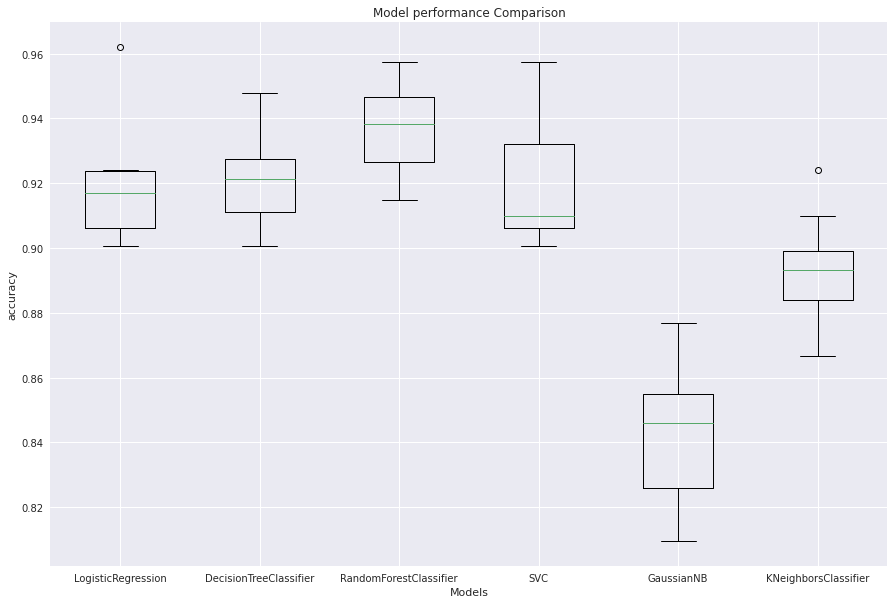

In [68]:
plt.figure(figsize=(15,10))
plt.boxplot(x=results,labels=name)
plt.xlabel('Models')
plt.ylabel('accuracy')
plt.title('Model performance Comparison')
plt.show()

# Comparing the 3 Models. lets see mean score of our three assumptions.

In [69]:
import pickle

def save_model(model, model_filepath):
    """
    Export your model as a pickle file.
    Saves trained model as pickle file to be loaded later.
    
    """
    
    filename = model_filepath
    pickle.dump(model, open(filename, 'wb'))

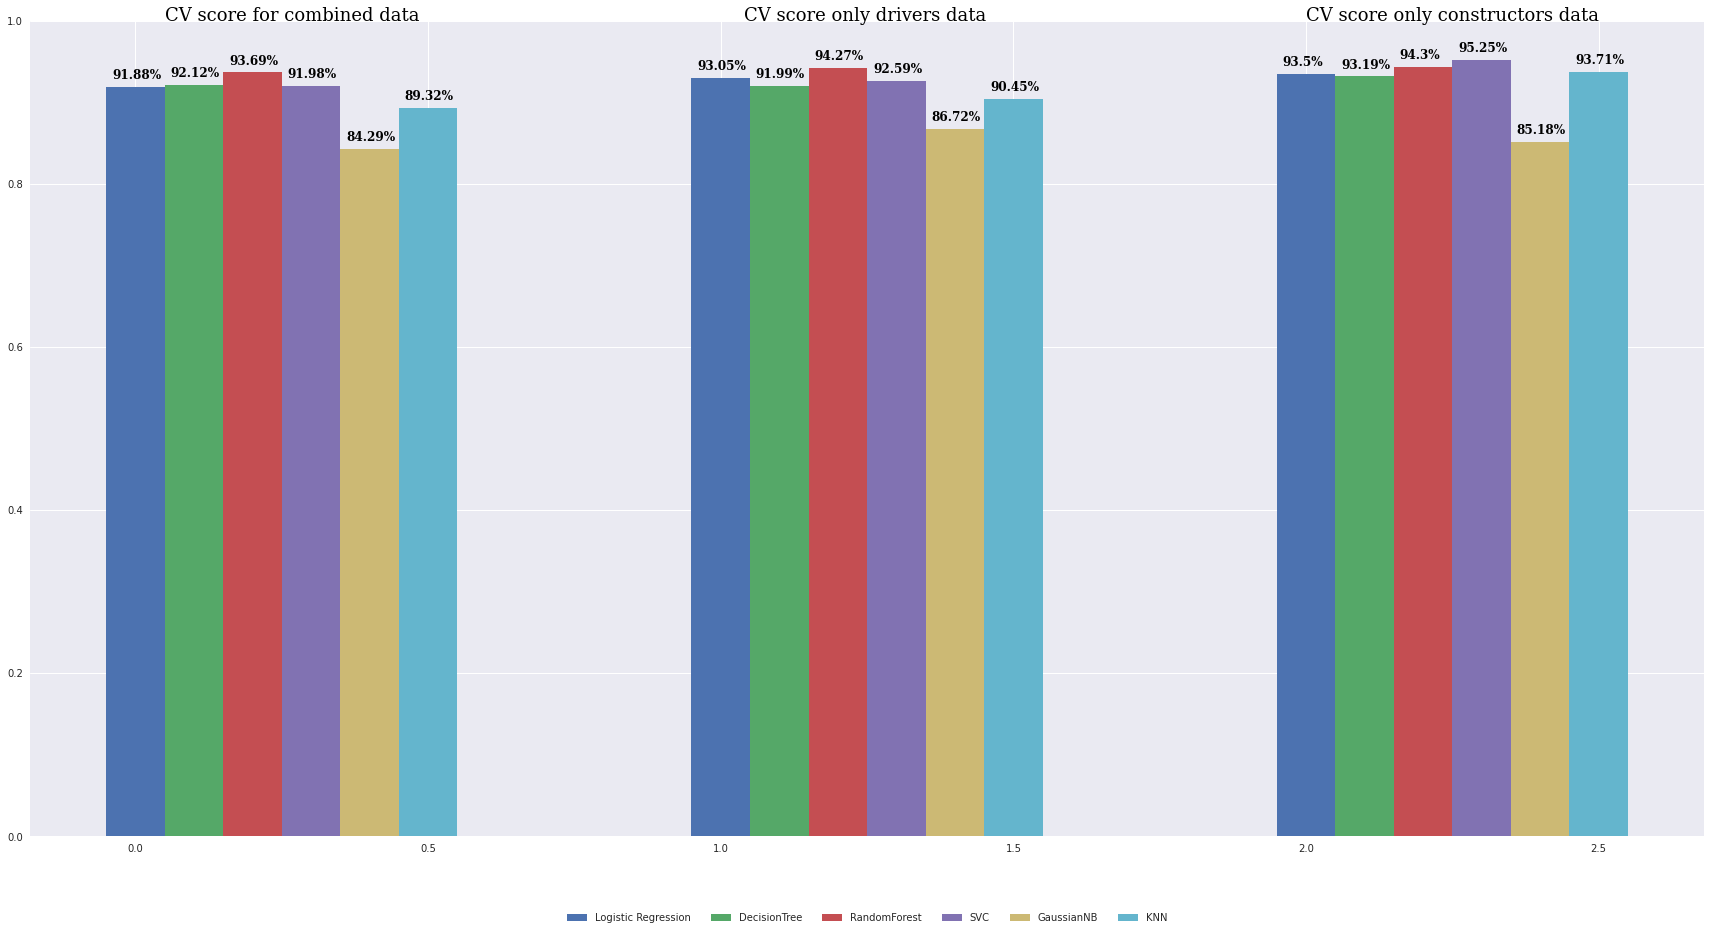

In [95]:
lr = [mean_results[0],mean_results_dri[0],mean_results_const[0]]
dtc = [mean_results[1],mean_results_dri[1],mean_results_const[1]]
rfc = [mean_results[2],mean_results_dri[2],mean_results_const[2]]
svc = [mean_results[3],mean_results_dri[3],mean_results_const[3]]
gnb = [mean_results[4],mean_results_dri[4],mean_results_const[4]]
knn = [mean_results[5],mean_results_dri[5],mean_results_const[5]]
font1 = {
    'family':'serif',
    'color':'black',
    'weight':'normal',
    'size':18
}
font2 = {
    'family':'serif',
    'color':'black',
    'weight':'bold',
    'size':12
}
x_ax = np.arange(3)
plt.figure(figsize=(30,15))
bar1 = plt.bar(x_ax,lr,width=0.1,align='center', label="Logistic Regression")
bar2 = plt.bar(x_ax+0.1,dtc,width=0.1,align='center', label="DecisionTree")
bar3 = plt.bar(x_ax+0.2,rfc,width=0.1,align='center', label="RandomForest")
bar4 = plt.bar(x_ax+0.3,svc,width=0.1,align='center', label="SVC")
bar5 = plt.bar(x_ax+0.4,gnb,width=0.1,align='center', label="GaussianNB")
bar6 = plt.bar(x_ax+0.5,knn,width=0.1,align='center', label="KNN")
plt.text(0.05,1,'CV score for combined data',fontdict=font1)
plt.text(1.04,1,'CV score only drivers data',fontdict=font1)
plt.text(2,1,'CV score only constructors data',fontdict=font1)
for bar in bar1.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar2.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar3.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar4.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar5.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar6.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.10), shadow=False, ncol=6)
plt.show()

# Generate Model Serving

In [71]:
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
min_samples_split = [2,5,8,10,15,20]
min_samples_leaf = [1,2,4,6,8,10]
bootstrap = [True,False]

random_parms = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap
                }

In [72]:
rf_rand = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf_rand,param_distributions=random_parms,n_iter=100,cv=10,verbose=2,n_jobs=-1)
rf_random.fit(X,y)
rf_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'n_estimators': 1800,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [73]:
rf = RandomForestClassifier(n_estimators=100,min_samples_split=20,min_samples_leaf=1,max_features='sqrt',max_depth=90,bootstrap=True)
kf = StratifiedKFold(n_splits=10,random_state=None,shuffle=False)
for train_index,test_index in kf.split(X,y):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]

In [74]:
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
cnf_mat_rf = confusion_matrix(y_test,y_pred_rf)
cnf_mat_rf = cnf_mat_rf/cnf_mat_rf.sum()

In [75]:
model_filepath='./models/{}.pkl'.format('RandomForestClassifier')
print('Saving model ...\n    MODEL: {}'.format(model_filepath))
save_model(rf, model_filepath)

Saving model ...
    MODEL: ./models/RandomForestClassifier.pkl


In [76]:
print(X.columns)

Index(['GP_name', 'quali_pos', 'constructor', 'driver', 'driver_confidence',
       'constructor_reliability'],
      dtype='object')


In [77]:
importances = rf.feature_importances_
importances

array([0.0186, 0.7575, 0.0387, 0.03  , 0.0735, 0.0817])

In [78]:
import time
import numpy as np

start_time = time.time()
std = np.std([
    tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.009 seconds


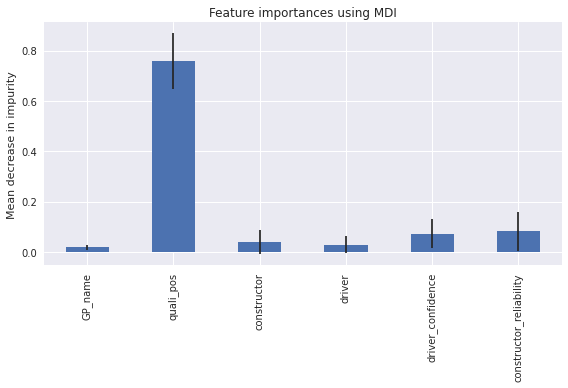

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [80]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
cnf_mat_svc = confusion_matrix(y_test,y_pred)
cnf_mat_svc = cnf_mat_svc/cnf_mat_svc.sum()

In [81]:
model_filepath='./models/{}.pkl'.format('SVC')
print('Saving model ...\n    MODEL: {}'.format(model_filepath))
save_model(svc, model_filepath)

Saving model ...
    MODEL: ./models/SVC.pkl


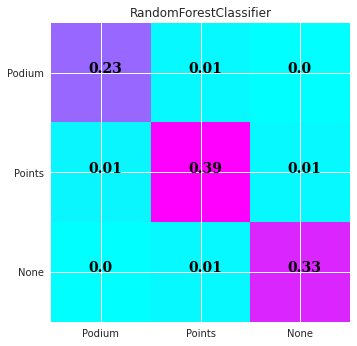

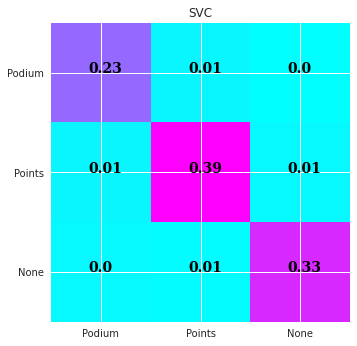

In [82]:
font3 = {
    'family':'serif',
    'color':'black',
    'weight':'bold',
    'size':14
}
fig1,ax1 = plt.subplots()
fig2,ax2 = plt.subplots()
ax1.set_xticks(np.arange(3))
ax1.set_yticks(np.arange(3))
ax1.set_xticklabels(['Podium','Points','None'])
ax1.set_yticklabels(['Podium','Points','None'])
ax1.set_title('RandomForestClassifier')
im_rf = ax1.imshow(cnf_mat_rf,cmap='cool')
for i in range(3):
    for j in range(3):
            ax1.text(i-0.125,j,round(cnf_mat_rf[i,j],2),fontdict=font3)

ax2.set_xticks(np.arange(3))
ax2.set_yticks(np.arange(3))
ax2.set_xticklabels(['Podium','Points','None'])
ax2.set_yticklabels(['Podium','Points','None'])
ax2.set_title('SVC')
im_svc = ax2.imshow(cnf_mat_svc,cmap='cool')
for i in range(3):
    for j in range(3):
            ax2.text(i-0.125,j,round(cnf_mat_rf[i,j],2),fontdict=font3)

In [83]:
rf_pression = precision_score(y_test, y_pred_rf, average='macro')
rf_f1 = f1_score(y_test,y_pred_rf,average='macro')
rf_recall = recall_score(y_test,y_pred_rf,average='macro')
svc_pression = precision_score(y_test, y_pred_svc, average='micro')
svc_f1 = f1_score(y_test,y_pred_svc,average='macro')
svc_recall = recall_score(y_test,y_pred_svc,average='macro')
metrics_dict ={
    'RandomForestClassifier':{'precision_score':rf_pression,'f1_score':rf_f1,'recall_score':rf_recall},
    'SVC':{'precision_score':svc_pression,'f1_score':svc_f1,'recall_score':svc_recall}
}
metrics_df = pd.DataFrame(metrics_dict)
metrics_df

,RandomForestClassifier,SVC
precision_score,0.956006,0.947619
f1_score,0.957218,0.945363
recall_score,0.958512,0.947346


In [84]:
end = time.time()

In [85]:
import datetime
str(datetime.timedelta(seconds=(end - start)))

'0:41:59.307150'

In [86]:
print(str(end - start)+" seconds")

2519.3071501255035 seconds
